In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [110]:
df_path="./Resources/AGE - household purchases Agg Data.csv"

In [111]:
df_age = pd.read_csv(df_path)

In [112]:
df_age.head ()

,Code,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,...,2014,2015,201516,201617,201718,201819,RSE indicator(a),% change since 201516,sig(b),trend since 201516(c)
0,cat520,Milk and milk products excluding cheese,NaN,NaN,NaN,30-39,ml,"1,813","1,780","1,776",...,"1,610","1,632","1,637","1,497","1,546","1,599",üü,-2,NaN,NaN
1,4006,NaN,"Liquid wholemilk, including school and welfare",NaN,NaN,30-39,ml,629,593,609,...,335,364,385,320,398,432,NaN,+12,NaN,NaN
2,4,NaN,NaN,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,...,335,364,385,320,398,432,NaN,+12,NaN,NaN
3,402,NaN,NaN,NaN,UHT milk,30-39,ml,11,5,11,...,4,8,8,0,9,5,û,-30,NaN,NaN
4,403,NaN,NaN,NaN,Sterilised,30-39,ml,16,11,2,...,0,1,1,0,3,0,û,-100,NaN,NaN


In [113]:
cleandf=df_age.drop(["RSE indicator(a)", "% change since 201516", "sig(b)", "trend since 201516(c)", "Code" ],axis=1)
cleandf

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2010,2011,2012,2013,2014,2015,201516,201617,201718,201819
0,Milk and milk products excluding cheese,NaN,NaN,NaN,30-39,ml,"1,813","1,780","1,776","1,781",...,"1,638","1,681","1,709","1,648","1,610","1,632","1,637","1,497","1,546","1,599"
1,NaN,"Liquid wholemilk, including school and welfare",NaN,NaN,30-39,ml,629,593,609,565,...,403,404,374,328,335,364,385,320,398,432
2,NaN,NaN,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,547,...,403,404,374,328,335,364,385,320,398,432
3,NaN,NaN,NaN,UHT milk,30-39,ml,11,5,11,17,...,8,3,2,3,4,8,8,0,9,5
4,NaN,NaN,NaN,Sterilised,30-39,ml,16,11,2,5,...,0,0,4,0,0,1,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,NaN,NaN,Spirits with mixer,NaN,75_and_over,ml,0,1,0,1,...,0,0,1,2,3,1,1,1,2,1
1681,NaN,NaN,Fortified wines,NaN,75_and_over,ml,32,46,40,34,...,24,27,24,24,27,25,28,17,31,14
1682,NaN,NaN,Spirits,NaN,75_and_over,ml,63,61,59,42,...,51,51,55,49,59,58,53,54,73,47
1683,NaN,NaN,Liqueurs and cocktails,NaN,75_and_over,ml,3,7,4,6,...,8,8,5,7,3,9,9,11,11,4


In [114]:
cleandf.fillna("--")

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2010,2011,2012,2013,2014,2015,201516,201617,201718,201819
0,Milk and milk products excluding cheese,--,--,--,30-39,ml,"1,813","1,780","1,776","1,781",...,"1,638","1,681","1,709","1,648","1,610","1,632","1,637","1,497","1,546","1,599"
1,--,"Liquid wholemilk, including school and welfare",--,--,30-39,ml,629,593,609,565,...,403,404,374,328,335,364,385,320,398,432
2,--,--,"Liquid wholemilk, full price",--,30-39,ml,615,572,589,547,...,403,404,374,328,335,364,385,320,398,432
3,--,--,--,UHT milk,30-39,ml,11,5,11,17,...,8,3,2,3,4,8,8,0,9,5
4,--,--,--,Sterilised,30-39,ml,16,11,2,5,...,0,0,4,0,0,1,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,--,--,Spirits with mixer,--,75_and_over,ml,0,1,0,1,...,0,0,1,2,3,1,1,1,2,1
1681,--,--,Fortified wines,--,75_and_over,ml,32,46,40,34,...,24,27,24,24,27,25,28,17,31,14
1682,--,--,Spirits,--,75_and_over,ml,63,61,59,42,...,51,51,55,49,59,58,53,54,73,47
1683,--,--,Liqueurs and cocktails,--,75_and_over,ml,3,7,4,6,...,8,8,5,7,3,9,9,11,11,4


In [115]:
#The popularity of fresh tomatoes within the 30-39 age group between 2001/2 and 2018/9

tominfo= cleandf.loc[(cleandf["Major Food Code"] == "Fresh tomatoes")]
tom2info=tominfo.loc[(tominfo["Age Group"]== "30-39")]
cleantom=tom2info.drop(["Food Category", "Food Group", "Minor Food Code", "Units", "Age Group","Major Food Code"], axis=1)
cleantom=cleantom.transpose()
cleantom.columns =[ 'Amount']
cleantom['Years'] = cleantom.index
cleantom.info ()


<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 2001-02 to 201819
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Amount  19 non-null     object
 1   Years   19 non-null     object
dtypes: object(2)
memory usage: 456.0+ bytes


## Notes for team!
So first use the cleandf and .loc to find your information, it should display for all age groups.  
If you need to narrow down further use .loc again or combine. Drop your additional columns, see above code for that.  
Transpose the code to make it easier to plot.  
Rename the transposed column.  
Clear and copy over index so you can plot values.  
check data types 

In [116]:
numtom=cleantom['Amount'].astype(int)
years=cleantom["Years"]

Here I am setting variable to plot with because I prefer pyplot, I have changed data type to integer too so I can plot it. 

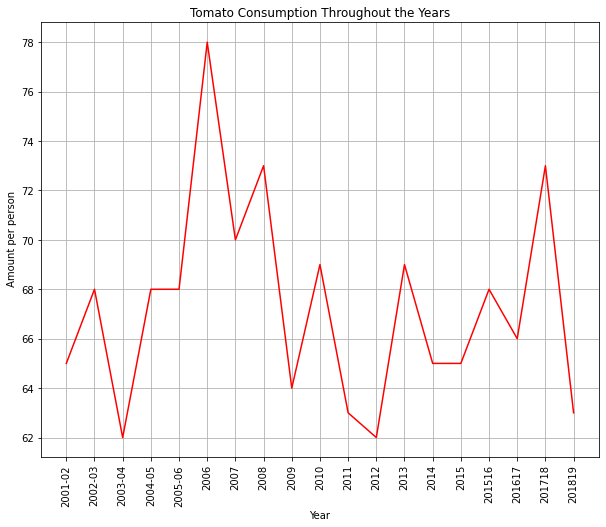

In [117]:
ln,plot=plt.subplots (figsize=(10, 8))
plt.plot(years,numtom,color="red")
plt.xticks(rotation=90)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel(" Amount per person")
plt.title("Tomato Consumption Throughout the Years")
plt.show ()

In [118]:
#Why did it dip in 2012? Is it the same for the other age groups?
tominfo
cleantomall=tominfo.drop(["Food Category", "Food Group", "Minor Food Code", "Units","Age Group","Major Food Code"], axis=1)
cleantomall=cleantomall.transpose ()
cleantomall.columns =['30-39','40-49','50-64','65-74','75_and_over']
cleantomall['Years'] = cleantomall.index
cleantomall

,30-39,40-49,50-64,65-74,75_and_over,Years
2001-02,65,83,128,154,139,2001-02
2002-03,68,75,135,146,128,2002-03
2003-04,62,84,132,162,130,2003-04
2004-05,68,79,131,155,135,2004-05
2005-06,68,75,127,154,134,2005-06
2006,78,73,128,153,133,2006
2007,70,79,124,142,121,2007
2008,73,69,112,129,122,2008
2009,64,70,109,134,130,2009
2010,69,77,109,143,140,2010


Once again this is just data cleaning so you can actually use the data to plot with, because we are using multiple age groups I used the below code to convert col data types to int.
Im using pyplot because I feel like it's easier to manipulate, feel free to use pandas if you prefer, the data cleaning process should remain the same :)  

-Happy plotting, peace out 

In [119]:
fix=cleantomall.astype({'30-39': 'int64', '40-49': 'int64', '50-64': 'int64', '65-74': 'int64', '75_and_over':'int64' })
fix.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 2001-02 to 201819
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   30-39        19 non-null     int64 
 1   40-49        19 non-null     int64 
 2   50-64        19 non-null     int64 
 3   65-74        19 non-null     int64 
 4   75_and_over  19 non-null     int64 
 5   Years        19 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.0+ KB


In [120]:
alltomyears=fix["Years"]

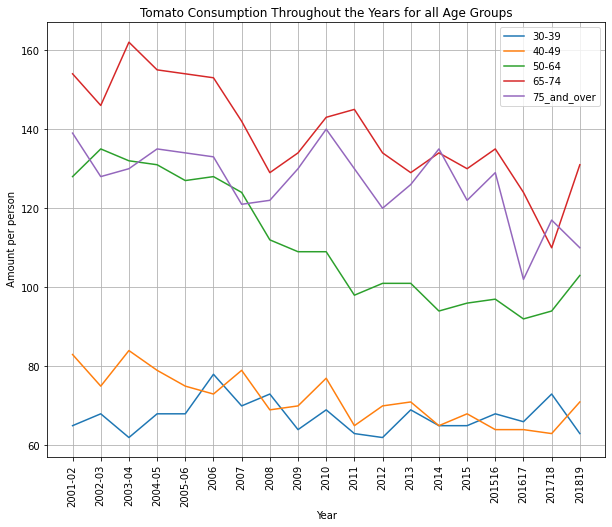

In [121]:
ln1,plot=plt.subplots (figsize=(10, 8))
plt.plot(alltomyears,fix['30-39'])
plt.plot(alltomyears,fix['40-49'])
plt.plot(alltomyears,fix['50-64'])
plt.plot(alltomyears,fix['65-74'])
plt.plot(alltomyears,fix['75_and_over'])
plt.legend (["30-39", "40-49", "50-64", "65-74", "75_and_over"], loc ="upper right")
plt.xticks(rotation=90)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel(" Amount per person")
plt.title("Tomato Consumption Throughout the Years for all Age Groups")
plt.show ()

# Kass Code & Visuals

In [123]:
cleandf.describe()

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2010,2011,2012,2013,2014,2015,201516,201617,201718,201819
count,55,115,845,670,1685,1685,1685,1685,1685,1685,...,1685,1685,1685,1685,1685,1685,1685,1685,1685,1685
unique,11,23,169,134,5,4,359,354,343,363,...,353,356,354,351,344,346,342,342,353,356
top,Milk and milk products excluding cheese,"Liquid wholemilk, including school and welfare","Liquid wholemilk, full price",UHT milk,30-39,g,0,0,0,1,...,0,0,1,0,1,1,0,0,0,0
freq,5,5,5,5,337,1390,110,102,98,85,...,92,88,90,102,97,98,95,102,108,110


In [190]:
cleandf['Total Amount Consumed'] = cleandf.sum(numeric_only=True, axis=1)
cleandf.head()

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2011,2012,2013,2014,2015,201516,201617,201718,201819,Total Amount Consumed
0,Milk and milk products excluding cheese,NaN,NaN,NaN,30-39,ml,"1,813","1,780","1,776","1,781",...,"1,681","1,709","1,648","1,610","1,632","1,637","1,497","1,546","1,599",0.0
1,NaN,"Liquid wholemilk, including school and welfare",NaN,NaN,30-39,ml,629,593,609,565,...,404,374,328,335,364,385,320,398,432,0.0
2,NaN,NaN,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,547,...,404,374,328,335,364,385,320,398,432,0.0
3,NaN,NaN,NaN,UHT milk,30-39,ml,11,5,11,17,...,3,2,3,4,8,8,0,9,5,0.0
4,NaN,NaN,NaN,Sterilised,30-39,ml,16,11,2,5,...,0,4,0,0,1,1,0,3,0,0.0


In [ ]:
food_pop_df = cleandf.copy

Total Amount consumed Code

In [194]:
def sum_by_column(frame, new_col_name, list_of_cols_to_sum):
    frame[new_col_name] = frame[list_of_cols_to_sum].astype(float).sum(axis=1)
    return(frame)
                                               
sum_by_column(food_pop_df, 'Total Amount Consumed', year_columns)
food_pop_df.head()
               

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2011,2012,2013,2014,2015,201516,201617,201718,201819,Total Amount Consumed
0,Milk and milk products excluding cheese,NaN,NaN,NaN,30-39,ml,1813,1780,1776,1781,...,1681,1709,1648,1610,1632,1637,1497,1546,1599,32196.0
1,NaN,"Liquid wholemilk, including school and welfare",NaN,NaN,30-39,ml,629,593,609,565,...,404,374,328,335,364,385,320,398,432,8631.0
2,NaN,NaN,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,547,...,404,374,328,335,364,385,320,398,432,8483.0
3,NaN,NaN,NaN,UHT milk,30-39,ml,11,5,11,17,...,3,2,3,4,8,8,0,9,5,138.0
4,NaN,NaN,NaN,Sterilised,30-39,ml,16,11,2,5,...,0,4,0,0,1,1,0,3,0,44.0


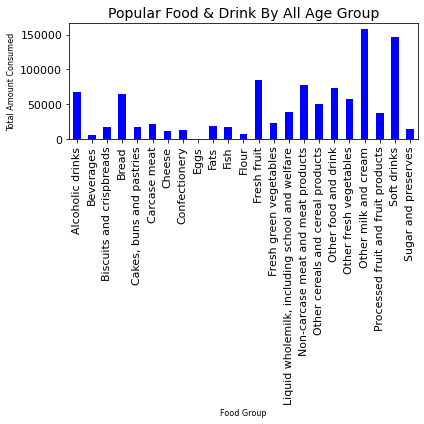

Food Group
Alcoholic drinks                                   67501.0
Beverages                                           6111.0
Biscuits and crispbreads                           17037.0
Bread                                              63936.0
Cakes, buns and pastries                           17367.0
Carcase meat                                       21481.0
Cheese                                             11227.0
Confectionery                                      13019.0
Eggs                                                 177.0
Fats                                               18766.0
Fish                                               16494.0
Flour                                               6339.0
Fresh fruit                                        84743.0
Fresh green vegetables                             22435.0
Liquid wholemilk, including school and welfare     39172.0
Non-carcase meat and meat products                 77599.0
Other cereals and cereal products            

In [189]:
popular_food_by_age = food_pop_df.groupby(["Food Group"]).sum() ["Total Amount Consumed"]

plot_pandas = popular_food_by_age.plot.bar(figsize=(6,6), color='b',fontsize = 11)
popular_food_by_age
plt.xlabel("Food Group",fontsize = 8)
plt.ylabel("Total Amount Consumed",fontsize = 8)
plt.title("Popular Food & Drink By All Age Group",fontsize = 14)

plt.savefig("./Images/Popular Food & Drink By All Age Group.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

popular_food_by_age
               

In [129]:
food_pop_df = cleandf.copy


In [27]:
food_pop_df.head()


,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2011,2012,2013,2014,2015,201516,201617,201718,201819,Total Amount Consumed
0,Milk and milk products excluding cheese,NaN,NaN,NaN,30-39,ml,"1,813","1,780","1,776","1,781",...,"1,681","1,709","1,648","1,610","1,632","1,637","1,497","1,546","1,599",0.0
1,NaN,"Liquid wholemilk, including school and welfare",NaN,NaN,30-39,ml,629,593,609,565,...,404,374,328,335,364,385,320,398,432,0.0
2,NaN,NaN,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,547,...,404,374,328,335,364,385,320,398,432,0.0
3,NaN,NaN,NaN,UHT milk,30-39,ml,11,5,11,17,...,3,2,3,4,8,8,0,9,5,0.0
4,NaN,NaN,NaN,Sterilised,30-39,ml,16,11,2,5,...,0,4,0,0,1,1,0,3,0,0.0


In [30]:
food_pop_df.fillna("0")


,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2011,2012,2013,2014,2015,201516,201617,201718,201819,Total Amount Consumed
0,Milk and milk products excluding cheese,0,0,0,30-39,ml,"1,813","1,780","1,776","1,781",...,"1,681","1,709","1,648","1,610","1,632","1,637","1,497","1,546","1,599",0.0
1,0,"Liquid wholemilk, including school and welfare",0,0,30-39,ml,629,593,609,565,...,404,374,328,335,364,385,320,398,432,0.0
2,0,0,"Liquid wholemilk, full price",0,30-39,ml,615,572,589,547,...,404,374,328,335,364,385,320,398,432,0.0
3,0,0,0,UHT milk,30-39,ml,11,5,11,17,...,3,2,3,4,8,8,0,9,5,0.0
4,0,0,0,Sterilised,30-39,ml,16,11,2,5,...,0,4,0,0,1,1,0,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,0,0,Spirits with mixer,0,75_and_over,ml,0,1,0,1,...,0,1,2,3,1,1,1,2,1,0.0
1681,0,0,Fortified wines,0,75_and_over,ml,32,46,40,34,...,27,24,24,27,25,28,17,31,14,0.0
1682,0,0,Spirits,0,75_and_over,ml,63,61,59,42,...,51,55,49,59,58,53,54,73,47,0.0
1683,0,0,Liqueurs and cocktails,0,75_and_over,ml,3,7,4,6,...,8,5,7,3,9,9,11,11,4,0.0


In [32]:
food_pop_df = cleandf

In [33]:
food_pop_df.fillna("--")

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2011,2012,2013,2014,2015,201516,201617,201718,201819,Total Amount Consumed
0,Milk and milk products excluding cheese,--,--,--,30-39,ml,"1,813","1,780","1,776","1,781",...,"1,681","1,709","1,648","1,610","1,632","1,637","1,497","1,546","1,599",0.0
1,--,"Liquid wholemilk, including school and welfare",--,--,30-39,ml,629,593,609,565,...,404,374,328,335,364,385,320,398,432,0.0
2,--,--,"Liquid wholemilk, full price",--,30-39,ml,615,572,589,547,...,404,374,328,335,364,385,320,398,432,0.0
3,--,--,--,UHT milk,30-39,ml,11,5,11,17,...,3,2,3,4,8,8,0,9,5,0.0
4,--,--,--,Sterilised,30-39,ml,16,11,2,5,...,0,4,0,0,1,1,0,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,--,--,Spirits with mixer,--,75_and_over,ml,0,1,0,1,...,0,1,2,3,1,1,1,2,1,0.0
1681,--,--,Fortified wines,--,75_and_over,ml,32,46,40,34,...,27,24,24,27,25,28,17,31,14,0.0
1682,--,--,Spirits,--,75_and_over,ml,63,61,59,42,...,51,55,49,59,58,53,54,73,47,0.0
1683,--,--,Liqueurs and cocktails,--,75_and_over,ml,3,7,4,6,...,8,5,7,3,9,9,11,11,4,0.0


In [37]:
food_pop_df['2001-02'] = food_pop_df['2001-02'].str.replace(",", "").astype(int)
food_pop_df.dtypes
food_pop_df.head()


,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2011,2012,2013,2014,2015,201516,201617,201718,201819,Total Amount Consumed
0,Milk and milk products excluding cheese,NaN,NaN,NaN,30-39,ml,1813,"1,780","1,776","1,781",...,"1,681","1,709","1,648","1,610","1,632","1,637","1,497","1,546","1,599",0.0
1,NaN,"Liquid wholemilk, including school and welfare",NaN,NaN,30-39,ml,629,593,609,565,...,404,374,328,335,364,385,320,398,432,0.0
2,NaN,NaN,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,547,...,404,374,328,335,364,385,320,398,432,0.0
3,NaN,NaN,NaN,UHT milk,30-39,ml,11,5,11,17,...,3,2,3,4,8,8,0,9,5,0.0
4,NaN,NaN,NaN,Sterilised,30-39,ml,16,11,2,5,...,0,4,0,0,1,1,0,3,0,0.0


In [38]:
cleandf

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2011,2012,2013,2014,2015,201516,201617,201718,201819,Total Amount Consumed
0,Milk and milk products excluding cheese,NaN,NaN,NaN,30-39,ml,1813,"1,780","1,776","1,781",...,"1,681","1,709","1,648","1,610","1,632","1,637","1,497","1,546","1,599",0.0
1,NaN,"Liquid wholemilk, including school and welfare",NaN,NaN,30-39,ml,629,593,609,565,...,404,374,328,335,364,385,320,398,432,0.0
2,NaN,NaN,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,547,...,404,374,328,335,364,385,320,398,432,0.0
3,NaN,NaN,NaN,UHT milk,30-39,ml,11,5,11,17,...,3,2,3,4,8,8,0,9,5,0.0
4,NaN,NaN,NaN,Sterilised,30-39,ml,16,11,2,5,...,0,4,0,0,1,1,0,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,NaN,NaN,Spirits with mixer,NaN,75_and_over,ml,0,1,0,1,...,0,1,2,3,1,1,1,2,1,0.0
1681,NaN,NaN,Fortified wines,NaN,75_and_over,ml,32,46,40,34,...,27,24,24,27,25,28,17,31,14,0.0
1682,NaN,NaN,Spirits,NaN,75_and_over,ml,63,61,59,42,...,51,55,49,59,58,53,54,73,47,0.0
1683,NaN,NaN,Liqueurs and cocktails,NaN,75_and_over,ml,3,7,4,6,...,8,5,7,3,9,9,11,11,4,0.0


In [54]:
cleandf.describe()

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2010,2011,2012,2013,2014,2015,201516,201617,201718,201819
count,55,115,845,670,1685,1685,1685,1685,1685,1685,...,1685,1685,1685,1685,1685,1685,1685,1685,1685,1685
unique,11,23,169,134,5,4,359,354,343,363,...,353,356,354,351,344,346,342,342,353,356
top,Milk and milk products excluding cheese,"Liquid wholemilk, including school and welfare","Liquid wholemilk, full price",UHT milk,30-39,g,0,0,0,1,...,0,0,1,0,1,1,0,0,0,0
freq,5,5,5,5,337,1390,110,102,98,85,...,92,88,90,102,97,98,95,102,108,110


In [55]:
cleandf['Total Amount Consumed'] = cleandf.sum(numeric_only=True, axis=1)
cleandf.head()

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2011,2012,2013,2014,2015,201516,201617,201718,201819,Total Amount Consumed
0,Milk and milk products excluding cheese,NaN,NaN,NaN,30-39,ml,"1,813","1,780","1,776","1,781",...,"1,681","1,709","1,648","1,610","1,632","1,637","1,497","1,546","1,599",0.0
1,NaN,"Liquid wholemilk, including school and welfare",NaN,NaN,30-39,ml,629,593,609,565,...,404,374,328,335,364,385,320,398,432,0.0
2,NaN,NaN,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,547,...,404,374,328,335,364,385,320,398,432,0.0
3,NaN,NaN,NaN,UHT milk,30-39,ml,11,5,11,17,...,3,2,3,4,8,8,0,9,5,0.0
4,NaN,NaN,NaN,Sterilised,30-39,ml,16,11,2,5,...,0,4,0,0,1,1,0,3,0,0.0


In [186]:
food_pop_df.head()

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2011,2012,2013,2014,2015,201516,201617,201718,201819,Total Amount Consumed
0,Milk and milk products excluding cheese,NaN,NaN,NaN,30-39,ml,1813,1780,1776,1781,...,1681,1709,1648,1610,1632,1637,1497,1546,1599,0.0
1,NaN,"Liquid wholemilk, including school and welfare",NaN,NaN,30-39,ml,629,593,609,565,...,404,374,328,335,364,385,320,398,432,0.0
2,NaN,NaN,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,547,...,404,374,328,335,364,385,320,398,432,0.0
3,NaN,NaN,NaN,UHT milk,30-39,ml,11,5,11,17,...,3,2,3,4,8,8,0,9,5,0.0
4,NaN,NaN,NaN,Sterilised,30-39,ml,16,11,2,5,...,0,4,0,0,1,1,0,3,0,0.0


In [135]:
year_columns

Index(['2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '201516', '201617', '201718', '201819'],
      dtype='object')

In [57]:
food_pop_df.fillna("--")

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2011,2012,2013,2014,2015,201516,201617,201718,201819,Total Amount Consumed
0,Milk and milk products excluding cheese,--,--,--,30-39,ml,"1,813","1,780","1,776","1,781",...,"1,681","1,709","1,648","1,610","1,632","1,637","1,497","1,546","1,599",0.0
1,--,"Liquid wholemilk, including school and welfare",--,--,30-39,ml,629,593,609,565,...,404,374,328,335,364,385,320,398,432,0.0
2,--,--,"Liquid wholemilk, full price",--,30-39,ml,615,572,589,547,...,404,374,328,335,364,385,320,398,432,0.0
3,--,--,--,UHT milk,30-39,ml,11,5,11,17,...,3,2,3,4,8,8,0,9,5,0.0
4,--,--,--,Sterilised,30-39,ml,16,11,2,5,...,0,4,0,0,1,1,0,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,--,--,Spirits with mixer,--,75_and_over,ml,0,1,0,1,...,0,1,2,3,1,1,1,2,1,0.0
1681,--,--,Fortified wines,--,75_and_over,ml,32,46,40,34,...,27,24,24,27,25,28,17,31,14,0.0
1682,--,--,Spirits,--,75_and_over,ml,63,61,59,42,...,51,55,49,59,58,53,54,73,47,0.0
1683,--,--,Liqueurs and cocktails,--,75_and_over,ml,3,7,4,6,...,8,5,7,3,9,9,11,11,4,0.0


In [59]:
food_pop_df['2001-02'] = food_pop_df['2001-02'].str.replace(",", "").astype(int)
food_pop_df.dtypes
food_pop_df.head()


,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2011,2012,2013,2014,2015,201516,201617,201718,201819,Total Amount Consumed
0,Milk and milk products excluding cheese,NaN,NaN,NaN,30-39,ml,1813,"1,780","1,776","1,781",...,"1,681","1,709","1,648","1,610","1,632","1,637","1,497","1,546","1,599",0.0
1,NaN,"Liquid wholemilk, including school and welfare",NaN,NaN,30-39,ml,629,593,609,565,...,404,374,328,335,364,385,320,398,432,0.0
2,NaN,NaN,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,547,...,404,374,328,335,364,385,320,398,432,0.0
3,NaN,NaN,NaN,UHT milk,30-39,ml,11,5,11,17,...,3,2,3,4,8,8,0,9,5,0.0
4,NaN,NaN,NaN,Sterilised,30-39,ml,16,11,2,5,...,0,4,0,0,1,1,0,3,0,0.0


In [60]:
food_pop_df.fillna("0")

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2011,2012,2013,2014,2015,201516,201617,201718,201819,Total Amount Consumed
0,Milk and milk products excluding cheese,0,0,0,30-39,ml,1813,"1,780","1,776","1,781",...,"1,681","1,709","1,648","1,610","1,632","1,637","1,497","1,546","1,599",0.0
1,0,"Liquid wholemilk, including school and welfare",0,0,30-39,ml,629,593,609,565,...,404,374,328,335,364,385,320,398,432,0.0
2,0,0,"Liquid wholemilk, full price",0,30-39,ml,615,572,589,547,...,404,374,328,335,364,385,320,398,432,0.0
3,0,0,0,UHT milk,30-39,ml,11,5,11,17,...,3,2,3,4,8,8,0,9,5,0.0
4,0,0,0,Sterilised,30-39,ml,16,11,2,5,...,0,4,0,0,1,1,0,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,0,0,Spirits with mixer,0,75_and_over,ml,0,1,0,1,...,0,1,2,3,1,1,1,2,1,0.0
1681,0,0,Fortified wines,0,75_and_over,ml,32,46,40,34,...,27,24,24,27,25,28,17,31,14,0.0
1682,0,0,Spirits,0,75_and_over,ml,63,61,59,42,...,51,55,49,59,58,53,54,73,47,0.0
1683,0,0,Liqueurs and cocktails,0,75_and_over,ml,3,7,4,6,...,8,5,7,3,9,9,11,11,4,0.0


In [62]:
food_pop_df['2002-03'] = food_pop_df['2002-03'].str.replace(",", "").astype(int)
food_pop_df.dtypes
food_pop_df.head()

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2011,2012,2013,2014,2015,201516,201617,201718,201819,Total Amount Consumed
0,Milk and milk products excluding cheese,NaN,NaN,NaN,30-39,ml,1813,1780,"1,776","1,781",...,"1,681","1,709","1,648","1,610","1,632","1,637","1,497","1,546","1,599",0.0
1,NaN,"Liquid wholemilk, including school and welfare",NaN,NaN,30-39,ml,629,593,609,565,...,404,374,328,335,364,385,320,398,432,0.0
2,NaN,NaN,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,547,...,404,374,328,335,364,385,320,398,432,0.0
3,NaN,NaN,NaN,UHT milk,30-39,ml,11,5,11,17,...,3,2,3,4,8,8,0,9,5,0.0
4,NaN,NaN,NaN,Sterilised,30-39,ml,16,11,2,5,...,0,4,0,0,1,1,0,3,0,0.0


In [71]:
food_pop_df['2003-04'] = food_pop_df['2003-04'].str.replace(",", "").astype(int)
food_pop_df.dtypes
food_pop_df.head()


,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2011,2012,2013,2014,2015,201516,201617,201718,201819,Total Amount Consumed
0,Milk and milk products excluding cheese,NaN,NaN,NaN,30-39,ml,1813,1780,1776,"1,781",...,"1,681","1,709","1,648","1,610","1,632","1,637","1,497","1,546","1,599",0.0
1,NaN,"Liquid wholemilk, including school and welfare",NaN,NaN,30-39,ml,629,593,609,565,...,404,374,328,335,364,385,320,398,432,0.0
2,NaN,NaN,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,547,...,404,374,328,335,364,385,320,398,432,0.0
3,NaN,NaN,NaN,UHT milk,30-39,ml,11,5,11,17,...,3,2,3,4,8,8,0,9,5,0.0
4,NaN,NaN,NaN,Sterilised,30-39,ml,16,11,2,5,...,0,4,0,0,1,1,0,3,0,0.0


In [72]:
food_pop_df = food_pop_df['2004-05'].str.replace(",", "").astype(int)
food_pop_df.dtypes
food_pop_df.head()

0    1781
1     565
2     547
3      17
4       5
Name: 2004-05, dtype: int64

In [74]:
food_pop_df = cleandf
for column in food_pop_df.columns[6:-1]:
    print(column)


2001-02
2002-03
2003-04
2004-05
2005-06
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
201516
201617
201718
201819


In [179]:
sum_by_column(food_pop_df, 'Total Amount Consumed', year_columns)
food_pop_df.head()

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2011,2012,2013,2014,2015,201516,201617,201718,201819,Total Amount Consumed
0,Milk and milk products excluding cheese,NaN,NaN,NaN,30-39,ml,1813,1780,1776,1781,...,1681,1709,1648,1610,1632,1637,1497,1546,1599,32196.0
1,NaN,"Liquid wholemilk, including school and welfare",NaN,NaN,30-39,ml,629,593,609,565,...,404,374,328,335,364,385,320,398,432,8631.0
2,NaN,NaN,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,547,...,404,374,328,335,364,385,320,398,432,8483.0
3,NaN,NaN,NaN,UHT milk,30-39,ml,11,5,11,17,...,3,2,3,4,8,8,0,9,5,138.0
4,NaN,NaN,NaN,Sterilised,30-39,ml,16,11,2,5,...,0,4,0,0,1,1,0,3,0,44.0


In [203]:
food_pop_df.head()

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2011,2012,2013,2014,2015,201516,201617,201718,201819,Total Amount Consumed
0,Milk and milk products excluding cheese,NaN,NaN,NaN,30-39,ml,1813,1780,1776,1781,...,1681,1709,1648,1610,1632,1637,1497,1546,1599,32196.0
1,NaN,"Liquid wholemilk, including school and welfare",NaN,NaN,30-39,ml,629,593,609,565,...,404,374,328,335,364,385,320,398,432,8631.0
2,NaN,NaN,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,547,...,404,374,328,335,364,385,320,398,432,8483.0
3,NaN,NaN,NaN,UHT milk,30-39,ml,11,5,11,17,...,3,2,3,4,8,8,0,9,5,138.0
4,NaN,NaN,NaN,Sterilised,30-39,ml,16,11,2,5,...,0,4,0,0,1,1,0,3,0,44.0


In [131]:
year_columns = food_pop_df.columns[6:-1]

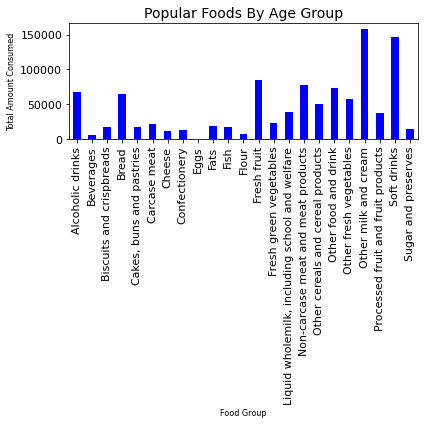

Food Group
Alcoholic drinks                                   67501.0
Beverages                                           6111.0
Biscuits and crispbreads                           17037.0
Bread                                              63936.0
Cakes, buns and pastries                           17367.0
Carcase meat                                       21481.0
Cheese                                             11227.0
Confectionery                                      13019.0
Eggs                                                 177.0
Fats                                               18766.0
Fish                                               16494.0
Flour                                               6339.0
Fresh fruit                                        84743.0
Fresh green vegetables                             22435.0
Liquid wholemilk, including school and welfare     39172.0
Non-carcase meat and meat products                 77599.0
Other cereals and cereal products            

In [195]:
popular_food_by_age = food_pop_df.groupby(["Food Group"]).sum() ["Total Amount Consumed"]

plot_pandas = popular_food_by_age.plot.bar(figsize=(6,6), color='b',fontsize = 11)
popular_food_by_age
plt.xlabel("Food Group",fontsize = 8)
plt.ylabel("Total Amount Consumed",fontsize = 8)
plt.title("Popular Foods By Age Group",fontsize = 14)

plt.savefig("./Images/Popular Food and Drinks By Age Group.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

popular_food_by_age

# Food Bar Chart

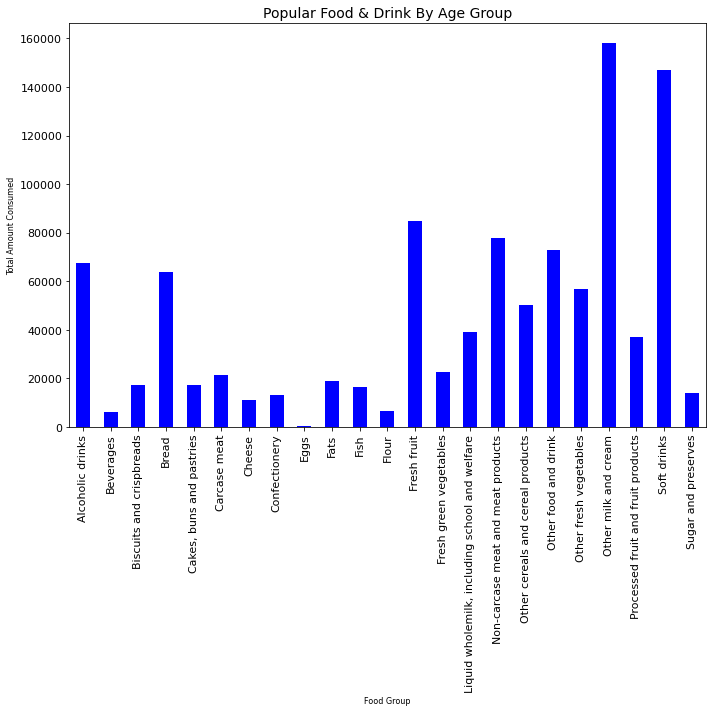

Food Group
Alcoholic drinks                                   67501.0
Beverages                                           6111.0
Biscuits and crispbreads                           17037.0
Bread                                              63936.0
Cakes, buns and pastries                           17367.0
Carcase meat                                       21481.0
Cheese                                             11227.0
Confectionery                                      13019.0
Eggs                                                 177.0
Fats                                               18766.0
Fish                                               16494.0
Flour                                               6339.0
Fresh fruit                                        84743.0
Fresh green vegetables                             22435.0
Liquid wholemilk, including school and welfare     39172.0
Non-carcase meat and meat products                 77599.0
Other cereals and cereal products            

In [202]:
popular_food_by_age = food_pop_df.groupby(["Food Group"]).sum() ["Total Amount Consumed"]

plot_pandas = popular_food_by_age.plot.bar(figsize=(10,10), color='b',fontsize = 11)
popular_food_by_age
plt.xlabel("Food Group",fontsize = 8)
plt.ylabel("Total Amount Consumed",fontsize = 8)
plt.title("Popular Food & Drink By Age Group",fontsize = 14)

plt.savefig("./Images/Popular Food & Drink By Age Group.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

popular_food_by_age

In [201]:
#popular_food_by_age = food_pop_df.groupby(["Food Group"]).sum() ["Total Amount Consumed"]
popular_drink = food_pop_df.loc[food_pop_df["Units"]=='ml']
popular_drink.head()

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2011,2012,2013,2014,2015,201516,201617,201718,201819,Total Amount Consumed
0,Milk and milk products excluding cheese,NaN,NaN,NaN,30-39,ml,1813,1780,1776,1781,...,1681,1709,1648,1610,1632,1637,1497,1546,1599,32196.0
1,NaN,"Liquid wholemilk, including school and welfare",NaN,NaN,30-39,ml,629,593,609,565,...,404,374,328,335,364,385,320,398,432,8631.0
2,NaN,NaN,"Liquid wholemilk, full price",NaN,30-39,ml,615,572,589,547,...,404,374,328,335,364,385,320,398,432,8483.0
3,NaN,NaN,NaN,UHT milk,30-39,ml,11,5,11,17,...,3,2,3,4,8,8,0,9,5,138.0
4,NaN,NaN,NaN,Sterilised,30-39,ml,16,11,2,5,...,0,4,0,0,1,1,0,3,0,44.0


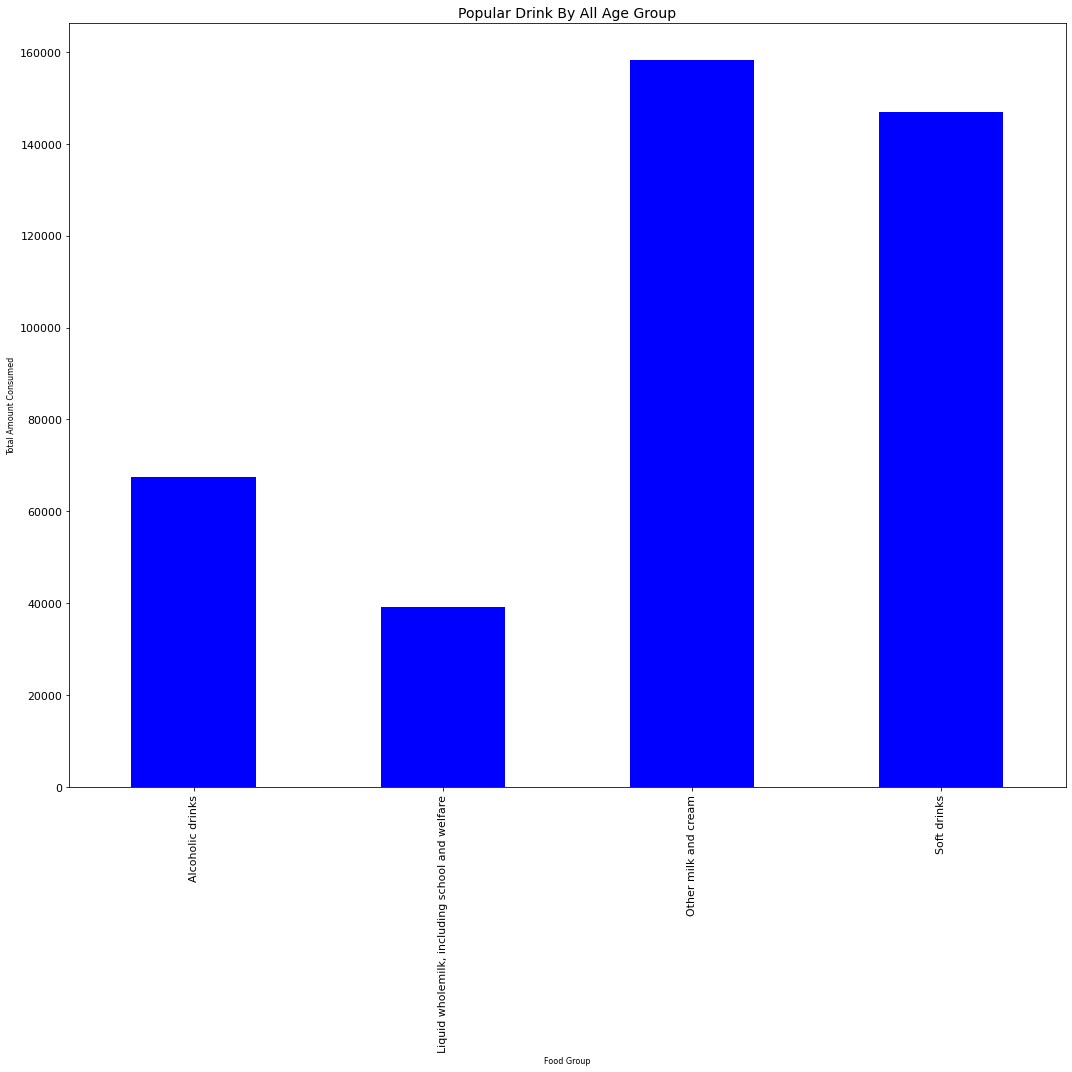

Food Group
Alcoholic drinks                                   67501.0
Liquid wholemilk, including school and welfare     39172.0
Other milk and cream                              158305.0
Soft drinks                                       146955.0
Name: Total Amount Consumed, dtype: float64

In [200]:
popular_drink_total = popular_drink.groupby(["Food Group"]).sum() ["Total Amount Consumed"]

plot_pandas = popular_drink_total.plot.bar(figsize=(15,15), color='b',fontsize = 11)
popular_drink_total
plt.xlabel("Food Group",fontsize = 8)
plt.ylabel("Total Amount Consumed",fontsize = 8)
plt.title("Popular Drink By All Age Group",fontsize = 14)

plt.savefig("./Images/Popular Drink By All Age Group.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

popular_drink_total


In [199]:
popular_food = food_pop_df.loc[food_pop_df["Units"]=='g']
popular_food.head()


,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2011,2012,2013,2014,2015,201516,201617,201718,201819,Total Amount Consumed
26,NaN,Cheese,NaN,NaN,30-39,g,104,100,94,99,...,107,100,108,98,104,108,114,125,105,1978.0
27,NaN,NaN,Natural cheese,NaN,30-39,g,91,87,80,84,...,97,90,95,87,94,98,105,114,96,1753.0
28,NaN,NaN,NaN,Hard cheese - cheddar type,30-39,g,58,54,52,53,...,61,55,60,49,57,58,57,62,58,1065.0
29,NaN,NaN,NaN,Hard cheese - other uk or foreign equivalent,30-39,g,12,11,7,10,...,4,5,5,5,4,5,6,5,2,126.0
30,NaN,NaN,NaN,Hard cheese - edam or other foreign,30-39,g,7,7,6,7,...,8,9,9,7,8,10,10,13,8,147.0


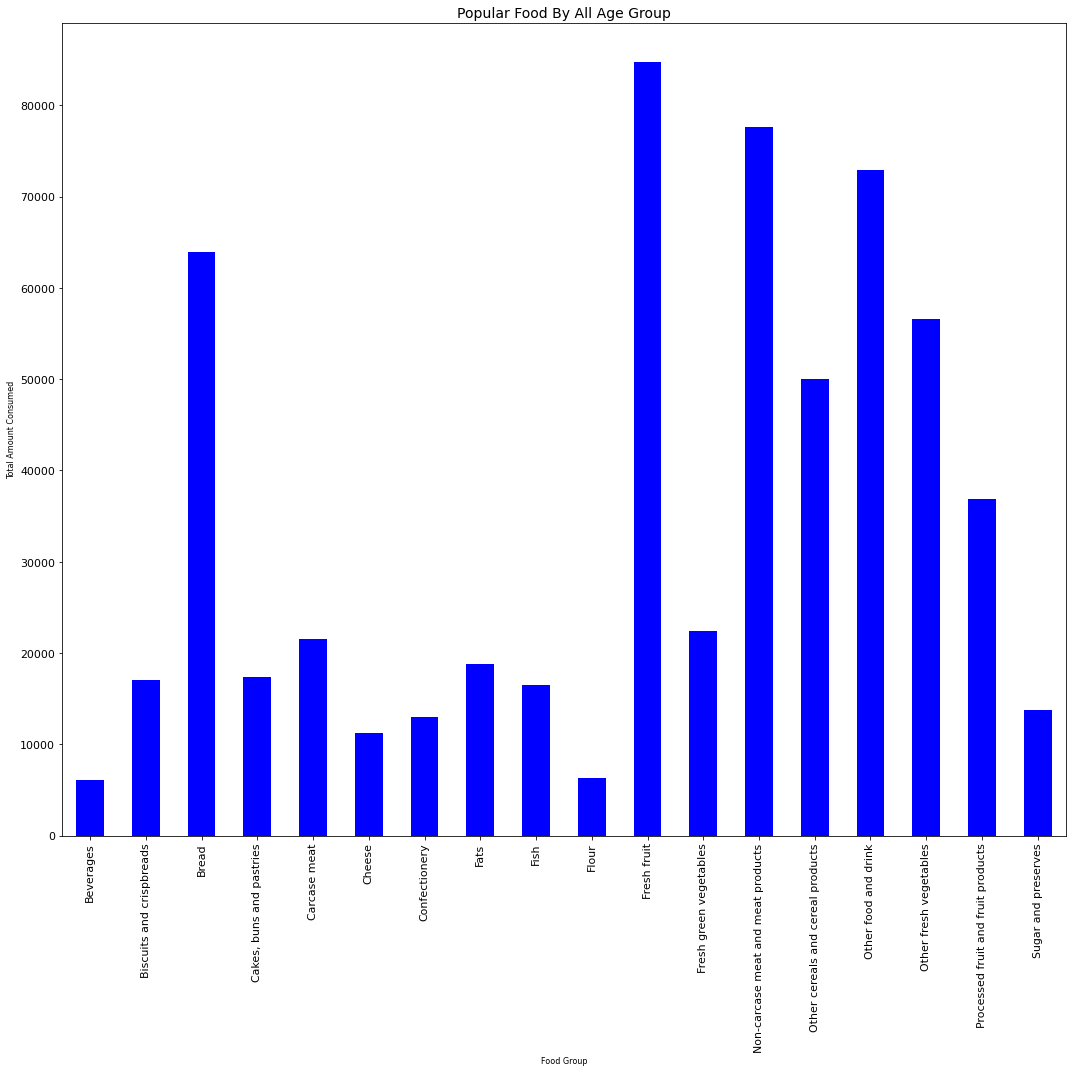

Food Group
Beverages                              6111.0
Biscuits and crispbreads              17037.0
Bread                                 63936.0
Cakes, buns and pastries              17367.0
Carcase meat                          21481.0
Cheese                                11227.0
Confectionery                         13019.0
Fats                                  18766.0
Fish                                  16494.0
Flour                                  6339.0
Fresh fruit                           84743.0
Fresh green vegetables                22435.0
Non-carcase meat and meat products    77599.0
Other cereals and cereal products     50052.0
Other food and drink                  72952.0
Other fresh vegetables                56640.0
Processed fruit and fruit products    36889.0
Sugar and preserves                   13741.0
Name: Total Amount Consumed, dtype: float64

In [198]:
popular_food_total = popular_food.groupby(["Food Group"]).sum() ["Total Amount Consumed"]

plot_pandas = popular_food_total.plot.bar(figsize=(15,15), color='b',fontsize = 11)
popular_food_total
plt.xlabel("Food Group",fontsize = 8)
plt.ylabel("Total Amount Consumed",fontsize = 8)
plt.title("Popular Food By All Age Group",fontsize = 14)

plt.savefig("./Images/Popular Food By All Age Group.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

popular_food_total

In [151]:
popular_milk_drinks = food_pop_df.loc[food_pop_df["Food Group"]=='Other milk and cream']
popular_milk_drinks.head()

,Food Category,Food Group,Major Food Code,Minor Food Code,Age Group,Units,2001-02,2002-03,2003-04,2004-05,...,2011,2012,2013,2014,2015,201516,201617,201718,201819,Total Amount Consumed
8,NaN,Other milk and cream,NaN,NaN,30-39,ml,1184,1187,1168,1215,...,1277,1335,1320,1275,1268,1253,1176,1148,1167,23565.0
345,NaN,Other milk and cream,NaN,NaN,40-49,ml,1345,1339,1346,1366,...,1314,1500,1400,1489,1363,1299,1379,1265,1324,26278.0
682,NaN,Other milk and cream,NaN,NaN,50-64,ml,1672,1715,1683,1846,...,1759,1722,1739,1749,1634,1610,1685,1639,1650,32827.0
1019,NaN,Other milk and cream,NaN,NaN,65-74,ml,1840,1885,2020,1950,...,2258,2174,2112,2084,1961,1970,2045,2146,2106,38955.0
1356,NaN,Other milk and cream,NaN,NaN,75_and_over,ml,1741,1766,1624,1734,...,2012,2095,1945,2110,1963,1942,1941,1984,2028,36680.0


# Milk Drinks

In [156]:
popular_milk_drinks_years=fix["Years"]

In [167]:
fixmilk=cleanmilkall.astype({'30-39': 'int64', '40-49': 'int64', '50-64': 'int64', '65-74': 'int64', '75_and_over':'int64' })
fixmilk.info ()


<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 2001-02 to 201819
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   30-39        19 non-null     int64 
 1   40-49        19 non-null     int64 
 2   50-64        19 non-null     int64 
 3   65-74        19 non-null     int64 
 4   75_and_over  19 non-null     int64 
 5   Years        19 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.0+ KB


In [168]:
allmilkyears=fixmilk["Years"]

In [162]:
milkinfo= food_pop_df.loc[(food_pop_df["Food Group"] == "Other milk and cream")]
cleanmilkall=milkinfo.drop(['Total Amount Consumed',"Food Category", "Food Group", "Minor Food Code", "Units","Age Group","Major Food Code"], axis=1)
cleanmilkall=cleanmilkall.transpose ()
cleanmilkall.columns =['30-39','40-49','50-64','65-74','75_and_over']
cleanmilkall['Years'] = cleanmilkall.index
cleanmilkall


,30-39,40-49,50-64,65-74,75_and_over,Years
2001-02,1184,1345,1672,1840,1741,2001-02
2002-03,1187,1339,1715,1885,1766,2002-03
2003-04,1168,1346,1683,2020,1624,2003-04
2004-05,1215,1366,1846,1950,1734,2004-05
2005-06,1270,1372,1808,2152,2007,2005-06
2006,1234,1425,1798,2085,1874,2006
2007,1284,1437,1798,2062,1978,2007
2008,1246,1420,1794,2013,1916,2008
2009,1323,1493,1733,2064,2055,2009
2010,1235,1402,1793,2028,1965,2010


In [163]:
milkinfo
cleanmilkall=milkinfo.drop(['Total Amount Consumed',"Food Category", "Food Group", "Minor Food Code", "Units","Age Group","Major Food Code"], axis=1)
cleanmilkall=cleanmilkall.transpose ()
cleanmilkall.columns =['30-39','40-49','50-64','65-74','75_and_over']
cleanmilkall['Years'] = cleanmilkall.index
cleanmilkall




,30-39,40-49,50-64,65-74,75_and_over,Years
2001-02,1184,1345,1672,1840,1741,2001-02
2002-03,1187,1339,1715,1885,1766,2002-03
2003-04,1168,1346,1683,2020,1624,2003-04
2004-05,1215,1366,1846,1950,1734,2004-05
2005-06,1270,1372,1808,2152,2007,2005-06
2006,1234,1425,1798,2085,1874,2006
2007,1284,1437,1798,2062,1978,2007
2008,1246,1420,1794,2013,1916,2008
2009,1323,1493,1733,2064,2055,2009
2010,1235,1402,1793,2028,1965,2010


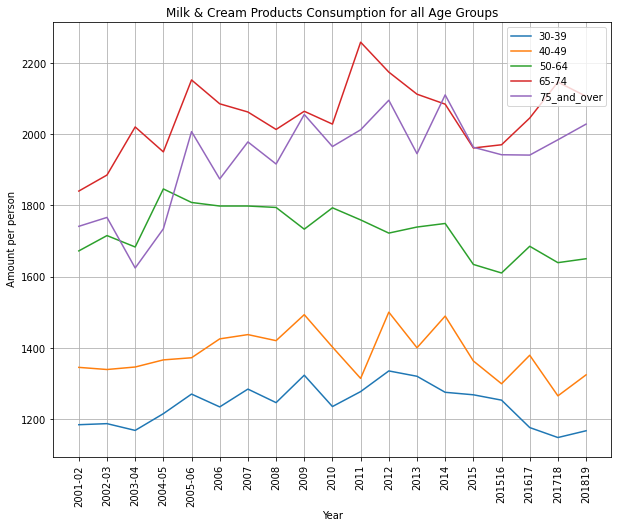

<Figure size 432x288 with 0 Axes>

In [197]:
ln1,plot=plt.subplots (figsize=(10, 8))
plt.plot(allmilkyears,fixmilk['30-39'])
plt.plot(allmilkyears,fixmilk['40-49'])
plt.plot(allmilkyears,fixmilk['50-64'])
plt.plot(allmilkyears,fixmilk['65-74'])
plt.plot(allmilkyears,fixmilk['75_and_over'])
plt.legend (["30-39", "40-49", "50-64", "65-74", "75_and_over"], loc ="upper right")
plt.xticks(rotation=90)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel(" Amount per person")
plt.title("Milk & Cream Products Consumption for all Age Groups")
plt.show ()
plt.savefig("./Images/Milk & Cream Products Consumption for all Age Groups.png")

# Fruit By Age Groups 

In [170]:
fruitinfo= food_pop_df.loc[(food_pop_df["Food Group"] == "Fresh fruit")]
cleanfruitall=fruitinfo.drop(['Total Amount Consumed',"Food Category", "Food Group", "Minor Food Code", "Units","Age Group","Major Food Code"], axis=1)
cleanfruitall=cleanfruitall.transpose ()
cleanfruitall.columns =['30-39','40-49','50-64','65-74','75_and_over']
cleanfruitall['Years'] = cleanfruitall.index
cleanfruitall


,30-39,40-49,50-64,65-74,75_and_over,Years
2001-02,535,652,981,1144,1049,2001-02
2002-03,593,632,1052,1225,1128,2002-03
2003-04,547,686,1014,1245,1130,2003-04
2004-05,597,677,1006,1216,1126,2004-05
2005-06,642,726,1047,1223,1204,2005-06
2006,652,738,1052,1232,1137,2006
2007,659,762,1039,1197,1162,2007
2008,659,665,926,1184,1050,2008
2009,627,643,908,1076,1060,2009
2010,609,634,889,1036,1128,2010


In [171]:
fixfruit=cleanfruitall.astype({'30-39': 'int64', '40-49': 'int64', '50-64': 'int64', '65-74': 'int64', '75_and_over':'int64' })
fixfruit.info ()


<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 2001-02 to 201819
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   30-39        19 non-null     int64 
 1   40-49        19 non-null     int64 
 2   50-64        19 non-null     int64 
 3   65-74        19 non-null     int64 
 4   75_and_over  19 non-null     int64 
 5   Years        19 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.0+ KB


In [172]:
allfruityears=fixfruit["Years"]

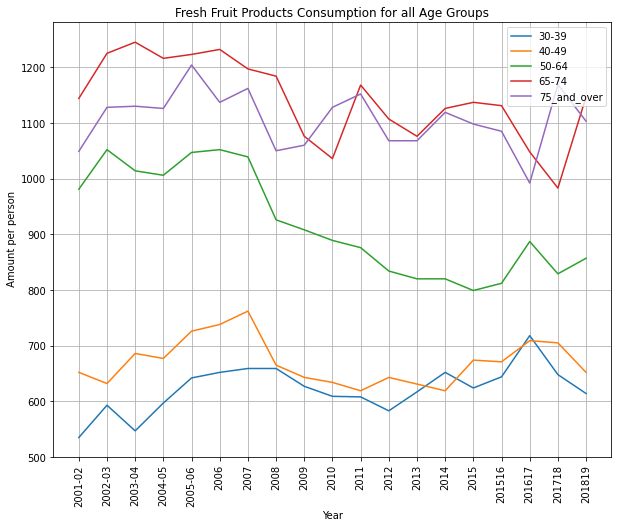

In [196]:
n1,plot=plt.subplots (figsize=(10, 8))
plt.plot(allfruityears,fixfruit['30-39'])
plt.plot(allfruityears,fixfruit['40-49'])
plt.plot(allfruityears,fixfruit['50-64'])
plt.plot(allfruityears,fixfruit['65-74'])
plt.plot(allfruityears,fixfruit['75_and_over'])
plt.legend (["30-39", "40-49", "50-64", "65-74", "75_and_over"], loc ="upper right")
plt.xticks(rotation=90)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel(" Amount per person")
plt.title("Fresh Fruit Products Consumption for all Age Groups")
plt.show ()
